<a href="https://colab.research.google.com/github/Jorge2018/DataScience2022-2/blob/main/Script_earlyStopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Imports
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns


# Carga datos

In [18]:
# Get data
df = pd.read_csv(r'https://raw.githubusercontent.com/Jorge2018/RepositorioArchivos/main/nba_logreg.csv', index_col = 'Name')
df.head()
df.shape

(1340, 20)

*Exploracion de datos*

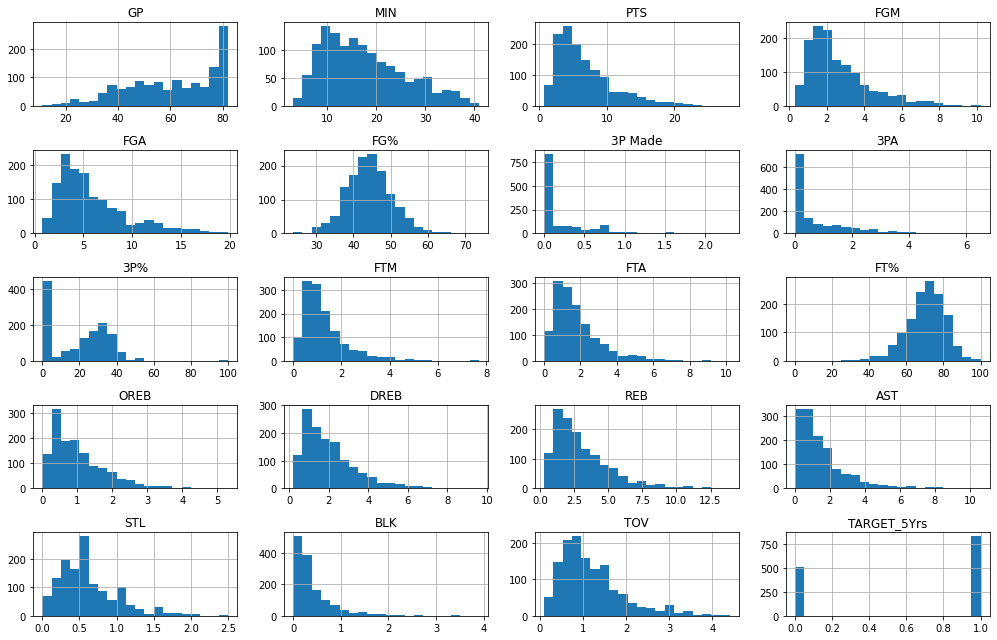

In [19]:
df.hist(bins=20,figsize=(14,9))
plt.tight_layout()
plt.show()

*Mapa de calor, exploracion de datos*

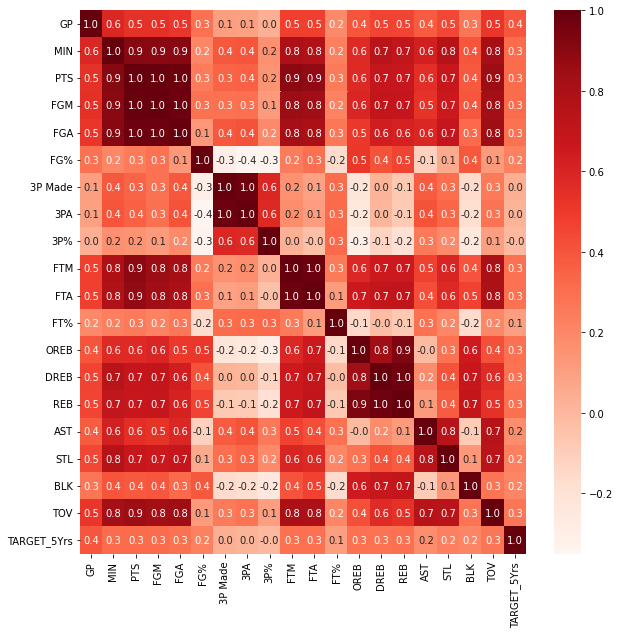

In [20]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap='Reds', annot=True, fmt='.1f')
plt.show()

In [21]:
print('Number of Duplicated Rows', df.duplicated().sum())
print('\n')
print(df.info())
print('\n')
df.describe()

Number of Duplicated Rows 12


<class 'pandas.core.frame.DataFrame'>
Index: 1340 entries, Brandon Ingram to Jon Barry
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GP           1340 non-null   int64  
 1   MIN          1340 non-null   float64
 2   PTS          1340 non-null   float64
 3   FGM          1340 non-null   float64
 4   FGA          1340 non-null   float64
 5   FG%          1340 non-null   float64
 6   3P Made      1340 non-null   float64
 7   3PA          1340 non-null   float64
 8   3P%          1329 non-null   float64
 9   FTM          1340 non-null   float64
 10  FTA          1340 non-null   float64
 11  FT%          1340 non-null   float64
 12  OREB         1340 non-null   float64
 13  DREB         1340 non-null   float64
 14  REB          1340 non-null   float64
 15  AST          1340 non-null   float64
 16  STL          1340 non-null   float64
 17  BLK          1340 non-null   float64
 18  TOV 

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


*Elimina Nan, separa col objetivo, divide en datos de entrenamiento y prueba, escala datos*

In [22]:
# Drop missings
df.dropna(inplace = True)
# Save X data
X = df.drop(columns = 'TARGET_5Yrs')
# Encode our target
y = df['TARGET_5Yrs']
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
# Scale our data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


*Crea red neuronal prealimentada*

In [23]:
# Step 1: Define our network structure
# Save the number of features we have as our input shape
input_shape = X_train.shape[1]
input_shape


19

In [24]:
# Without early stopping
# Sequential model
model = Sequential()
# First hidden layer
model.add(Dense(19, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
model.add(Dense(10, 
                activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam')
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=100)





Epoch 1/100
32/32 [==============================] - 2s 15ms/step - loss: 0.7117 - val_loss: 0.6543
Epoch 2/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6374 - val_loss: 0.6295
Epoch 3/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6163 - val_loss: 0.6170
Epoch 4/100
32/32 [==============================] - 0s 9ms/step - loss: 0.6051 - val_loss: 0.6091
Epoch 5/100
32/32 [==============================] - 0s 10ms/step - loss: 0.5971 - val_loss: 0.6031
Epoch 6/100
32/32 [==============================] - 0s 12ms/step - loss: 0.5895 - val_loss: 0.5969
Epoch 7/100
32/32 [==============================] - 0s 11ms/step - loss: 0.5836 - val_loss: 0.5922
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 0.5782 - val_loss: 0.5883
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5737 - val_loss: 0.5853
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5708 - val_loss: 0.5826
Epoch

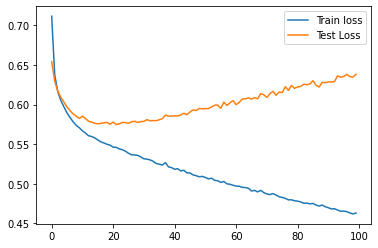

In [25]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

*Caray, nuestro modelo está muy sobreajustado. Observa cómo la pérdida de entrenamiento continúa disminuyendo a medida que la pérdida en la prueba comienza a aumentar cuando aumentamos el número de épocas para las que entrenamos nuestro modelo. Este es un problema muy común con redes neuronales y nos dice que nuestro modelo está sobreajustado y que no está funcionando bien con los datos ocultos.*



*Creemos este mismo modelo con early stopping para intentar evitar el sobreajuste. Dropout en Keras está codificado como otra capa, después de la capa que se quiere abandonar. También debes especificar la probabilidad de dropout (la probabilidad que cada neurona individual tiene que eliminarse de abandonar el entrenamiento en esa época).*

In [26]:
# With early stopping
# Sequential model
model = Sequential()
# First hidden layer
model.add(Dense(19, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
model.add(Dense(10, 
                activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam')
early_stopping = EarlyStopping(patience = 5)
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=100,
                    callbacks = [early_stopping])





Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 0.6286 - val_loss: 0.5948
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5936 - val_loss: 0.5810
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5831 - val_loss: 0.5770
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5770 - val_loss: 0.5743
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5728 - val_loss: 0.5710
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5694 - val_loss: 0.5690
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5669 - val_loss: 0.5678
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5630 - val_loss: 0.5666
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5619 - val_loss: 0.5652
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5595 - val_loss: 0.5656
Epoch 11/

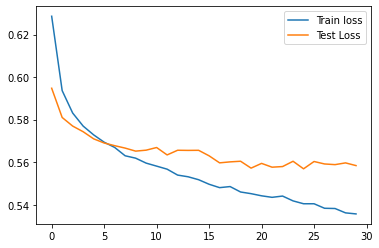

In [27]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();



*Esto está mucho menos sobreajustado, ya que solo entrenamos alrededor de 30 épocas (el tuyo podría haber entrenado para un número ligeramente diferente de épocas). Early stopping puede evitar el sobreajuste y ahorrarte tiempo de entrenamiento.*

*Se observa una baja en el sobreajuste*